#  SALES DATA ANALYSIS AND FORECASTING

In [3]:
import numpy as np
import pandas as pd

# Step-1  Data Cleaning & Preprocessing

In [10]:
# Load dataset
df = pd.read_csv(r'E:\sales data project\retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [11]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [14]:
# Check data types
print(df.dtypes)

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object


In [13]:
# Check for missing/null values
print(df.isnull().sum())

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [15]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Confirm the change
print(df.dtypes)


Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object


In [16]:
# Basic descriptive statistics for numerical columns
df.describe()

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


In [17]:
# Check number of duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")


Number of duplicate rows: 0


# Step-2 Exploratory Data Analysis (EDA)

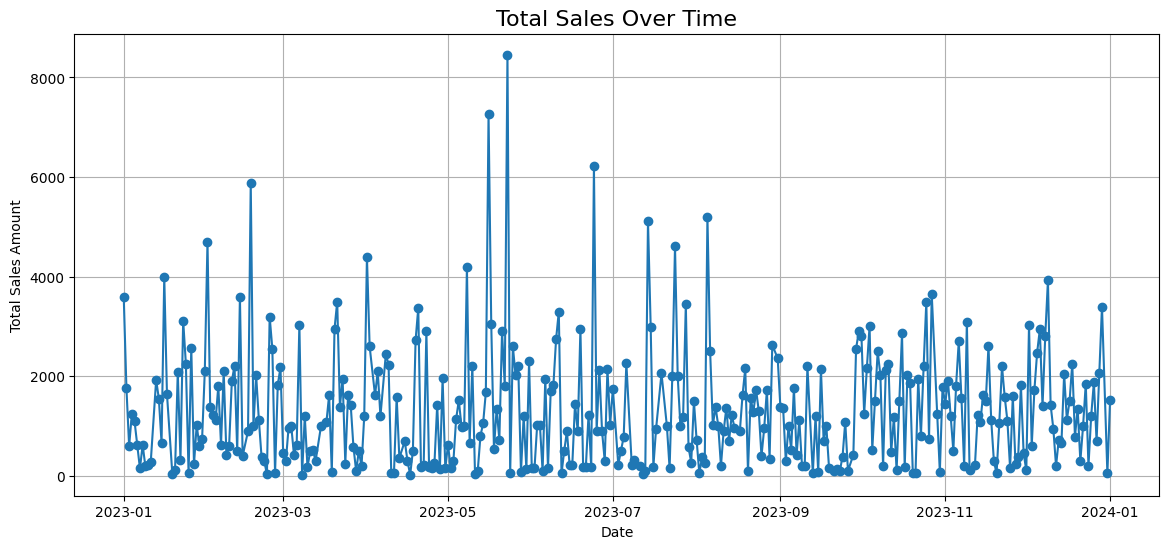

In [19]:
# Group total sales by Date
import matplotlib.pyplot as plt
sales_over_time = df.groupby('Date')['Total Amount'].sum()

# Plot the line chart
plt.figure(figsize=(14,6))
plt.plot(sales_over_time.index, sales_over_time.values, marker='o')
plt.title('Total Sales Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.show()

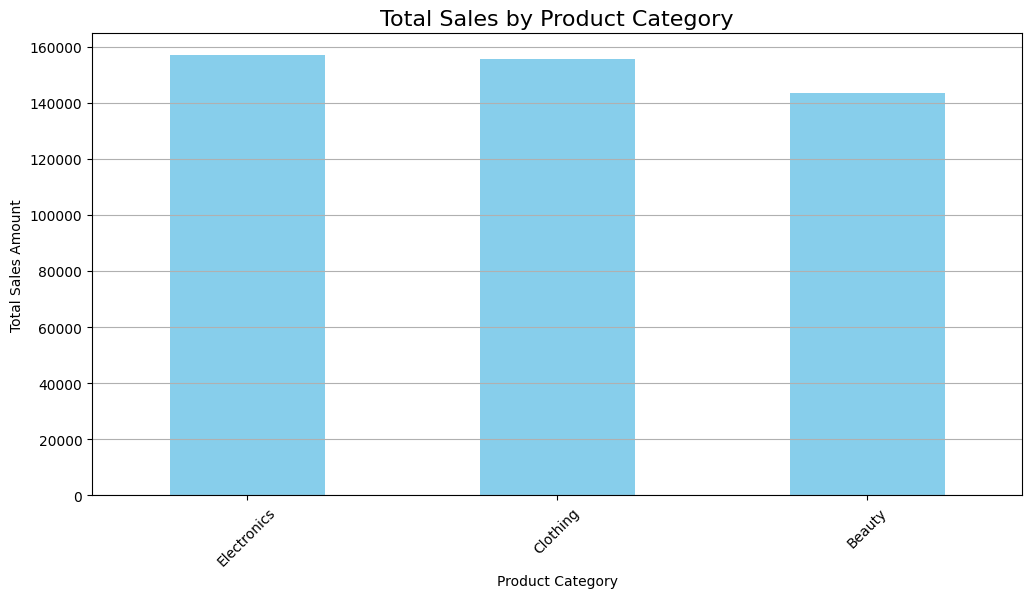

In [27]:
# Group total sales by Product Category
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
category_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Product Category', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


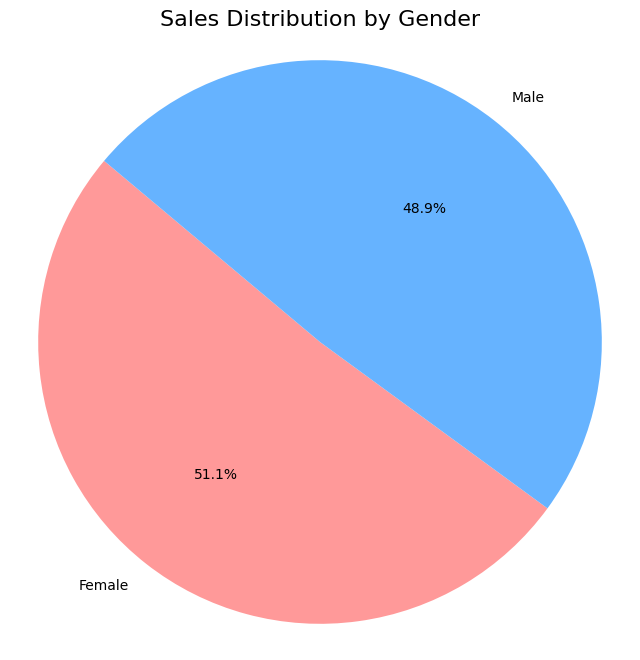

In [28]:
# Group total sales by Gender
gender_sales = df.groupby('Gender')['Total Amount'].sum()

# Plot pie chart
plt.figure(figsize=(8,8))
plt.pie(gender_sales, labels=gender_sales.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Sales Distribution by Gender', fontsize=16)
plt.axis('equal')
plt.show()


C:\Users\Jai Ambey\AppData\Local\Temp\ipykernel_14296\2691715289.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)


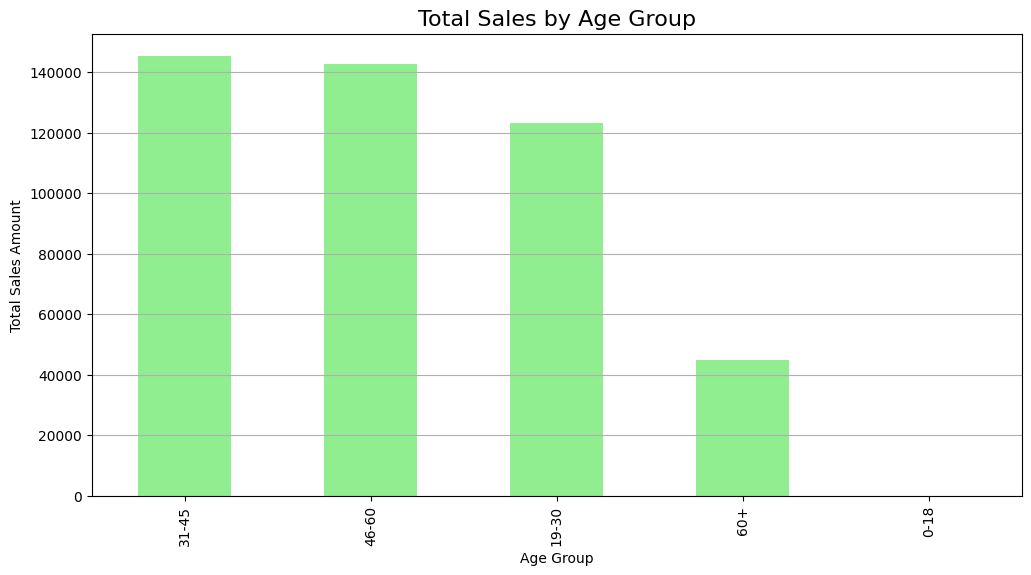

In [29]:
# Create age groups
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group total sales by Age Group
age_group_sales = df.groupby('Age Group')['Total Amount'].sum().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(12,6))
age_group_sales.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Age Group', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Total Sales Amount')
plt.grid(axis='y')
plt.show()


# Step-3 Feature Engineering

In [30]:
# Create date-related features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.day_name()
df['Quarter'] = df['Date'].dt.quarter

# Check the updated dataframe
df.head()


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group,Year,Month,Day,DayOfWeek,Quarter
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,31-45,2023,11,24,Friday,4
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,19-30,2023,2,27,Monday,1
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,46-60,2023,1,13,Friday,1
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,31-45,2023,5,21,Sunday,2
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,31-45,2023,5,6,Saturday,2


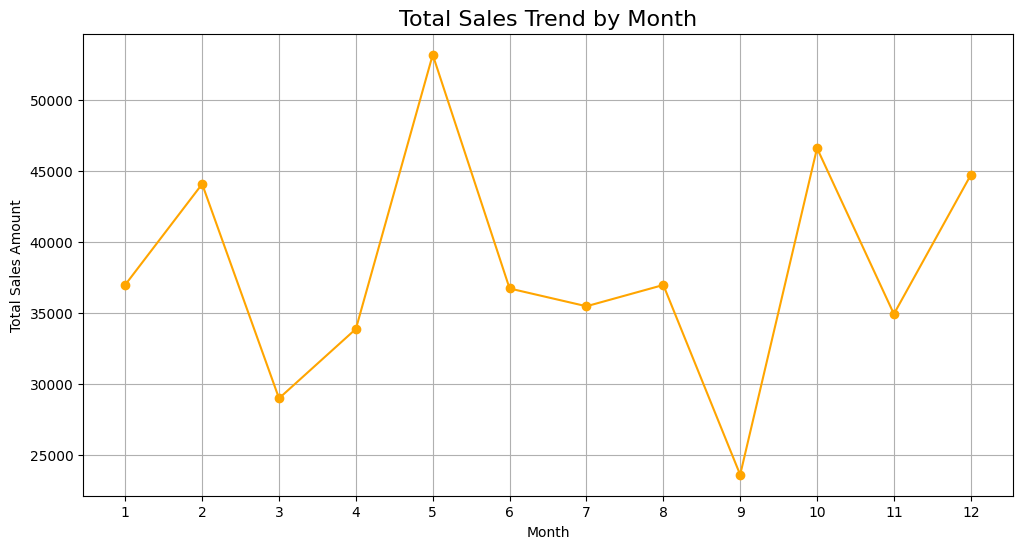

In [31]:
# Group total sales by Month
monthly_sales = df.groupby('Month')['Total Amount'].sum()

# Plot line chart
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Total Sales Trend by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')
plt.grid(True)
plt.xticks(range(1,13))
plt.show()


In [32]:
# Sort data by Date first (always important before calculating moving averages)
df = df.sort_values('Date')

# Create 7-day Moving Average of Total Amount
df['7-Day Moving Average'] = df['Total Amount'].rolling(window=7).mean()

# Check result
df[['Date', 'Total Amount', '7-Day Moving Average']].head(15)


,Date,Total Amount,7-Day Moving Average
521,2023-01-01,1500,NaN
179,2023-01-01,900,NaN
558,2023-01-01,1200,NaN
302,2023-01-02,90,NaN
978,2023-01-02,25,NaN
162,2023-01-02,150,NaN
420,2023-01-02,1500,766.428571
609,2023-01-03,600,637.857143
682,2023-01-04,1000,652.142857
230,2023-01-04,150,502.142857


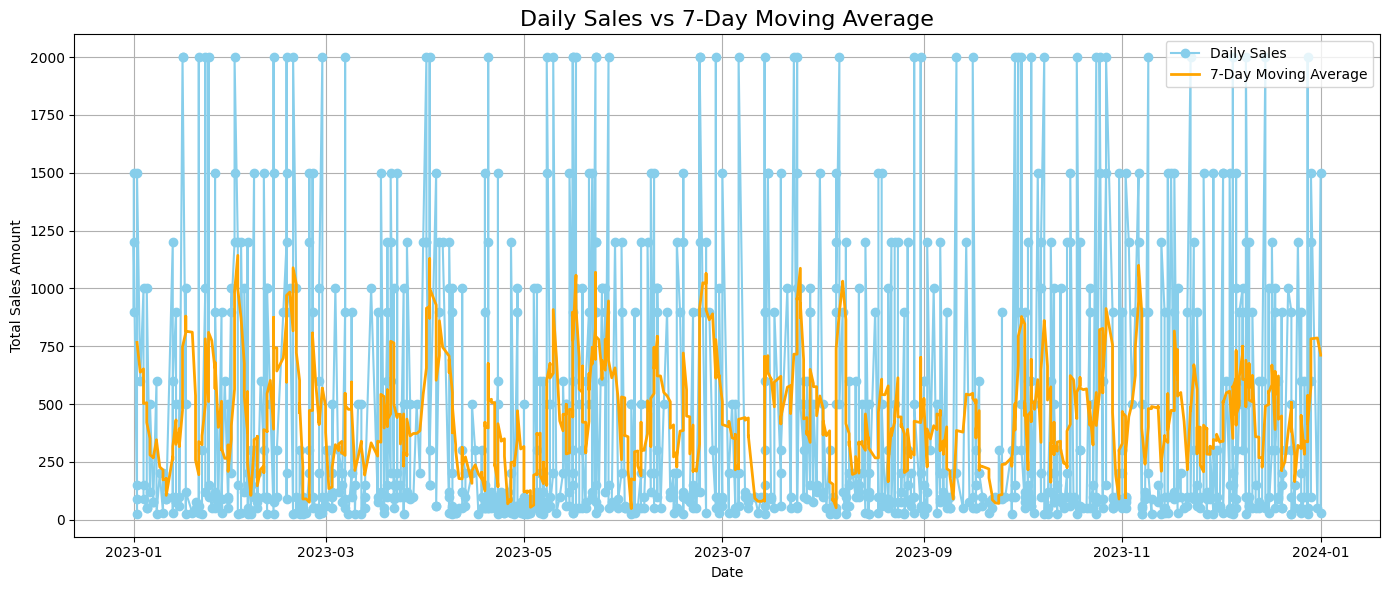

In [35]:
# Plot Total Sales and 7-Day Moving Average
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Total Amount'], label='Daily Sales', color='skyblue', marker='o')
plt.plot(df['Date'], df['7-Day Moving Average'], label='7-Day Moving Average', color='orange', linewidth=2)
plt.title('Daily Sales vs 7-Day Moving Average', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


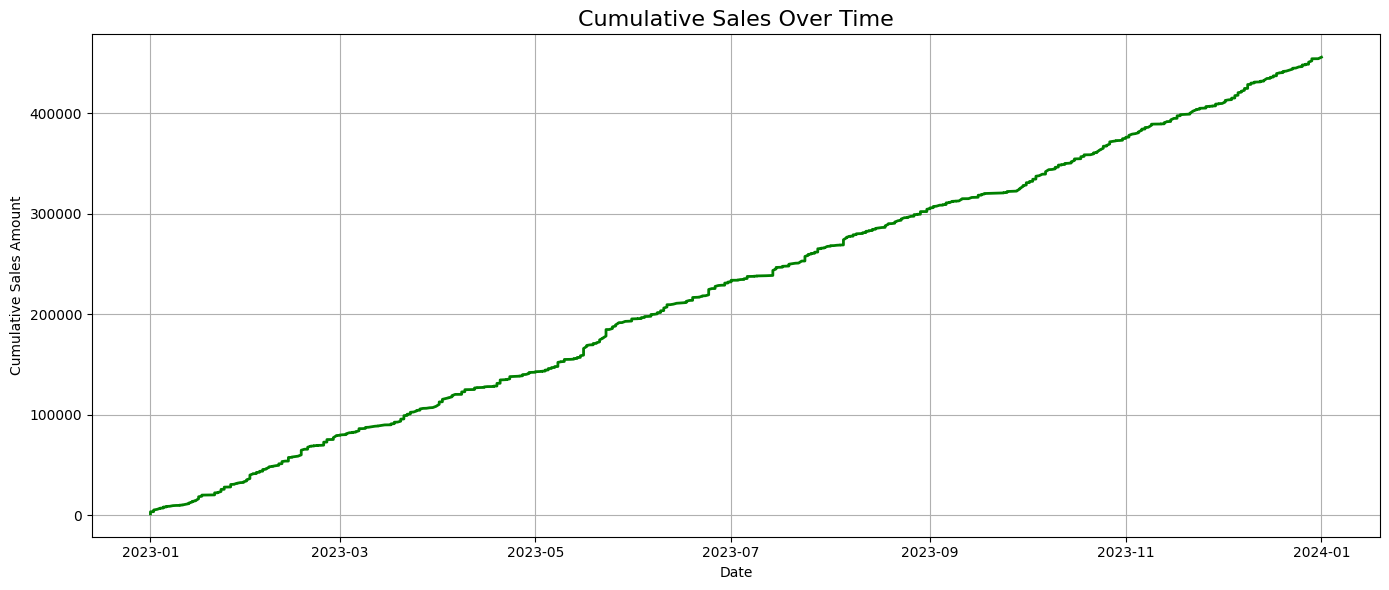

In [38]:
# Calculate cumulative sales
df['Cumulative Sales'] = df['Total Amount'].cumsum()

# Plot cumulative sales
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Cumulative Sales'], color='green', linewidth=2)
plt.title('Cumulative Sales Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Cumulative Sales Amount')
plt.grid(True)
plt.tight_layout()
plt.show()
